In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [9]:
adv = pd.read_csv(r'Data/Advertising.csv',index_col=0)
adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [13]:
credit = pd.read_csv(r'Data/Credit.csv',index_col =0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


array([0.04753664])

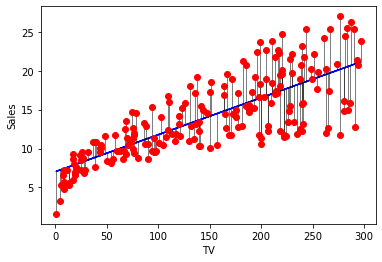

In [496]:
X = adv['TV'].values.reshape(-1,1)
X_cen =scale(adv['TV'],with_mean=True, with_std = False).reshape(-1,1)
y =adv['Sales'] 
clf = LinearRegression()
clf.fit(X,y)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.plot(X,clf.predict(X),'b-')

import matplotlib.lines as mlines
for item in zip(X[:,0],y,clf.predict(X)):
    l = mlines.Line2D([item[0],item[0]], [item[1],item[2]])
    l.set_color('black')
    l.set_linewidth(0.5)
    ax.add_line(l)
ax.plot(X,y,'ro')

clf.intercept_
clf.coef_

In [498]:
# Create grid coordinates for plotting
B0 = np.linspace(clf.intercept_-2,clf.intercept_+2, 50)
B1 = np.linspace(clf.coef_-0.02,clf.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')


In [499]:
B = np.array((xx,yy)).reshape(2,-1)
X1 = np.hstack((np.ones(X.shape), X))
RSS2 = np.sum(((y.values.reshape(-1,1) - np.dot(X1,B))**2)/1000,axis=0, keepdims= True)
RSS = RSS2.reshape(xx.shape)


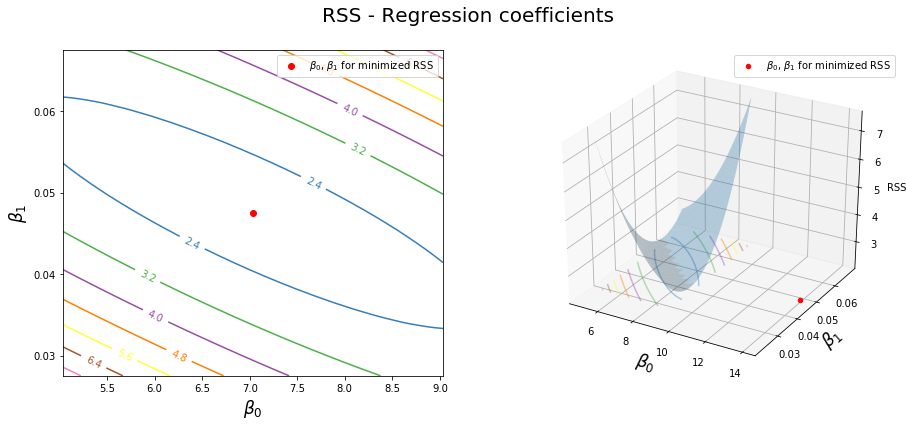

In [500]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, RSS, cmap=plt.cm.Set1)
ax1.scatter(clf.intercept_,clf.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy,RSS, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, RSS, zdir='z', offset=RSS.min(), cmap=plt.cm.Set1,
            alpha=0.4)

ax2.scatter3D(regr.intercept_, regr.coef_[0],RSS.min(), c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(RSS.min(),RSS.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

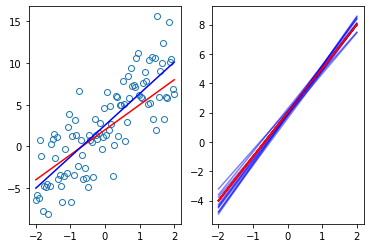

In [495]:
num = 100
x = np.linspace(-2,2,num).reshape(-1,1)

def gen_data(x):
    eps = [np.random.normal(scale=3) for i in range(num)]
    return 2+3*x.ravel()+eps,eps

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
y,eps = gen_data(x)
ax.plot(x,y,'o',fillstyle = 'none')
ax.plot(x,y-eps,'r-')
clf.fit(x,y)
ax.plot(x,clf.predict(x),'-b')
ax2 = fig.add_subplot(1,2,2)

for _ in range(10):
    y,eps = gen_data(x)
    ax2.plot(x,y-eps,'r-')
    clf.fit(x,y)
    ax2.plot(x,clf.predict(x),'b-',alpha = 0.5)


In [24]:
import statsmodels.api as sm

import statsmodels.formula.api as smf


# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Sales ~ TV', data=adv).fit()


In [513]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [516]:
results.summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Wed, 19 Feb 2020",Prob (F-statistic):,1.47e-42
Time:,15:18:53,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [517]:
results = smf.ols('Sales ~ Radio', data=adv).fit()
results.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [518]:
results = smf.ols('Sales ~ Newspaper', data=adv).fit()
results.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [535]:
results = smf.ols('Sales ~ TV + Radio+Newspaper', data=adv).fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


In [547]:
RSE = np.sqrt(np.sum(results.resid**2)/results.df_resid)
print(f'RSE: {RSE}')
results.summary().tables[0]

RSE: 1.685510373414744


Dep. Variable:,Sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,570.3
Date:,"Wed, 19 Feb 2020",Prob (F-statistic):,1.58e-96
Time:,15:40:20,Log-Likelihood:,-386.18
No. Observations:,200,AIC:,780.4
Df Residuals:,196,BIC:,793.6
Df Model:,3,,
Covariance Type:,nonrobust,,


In [548]:
np.corrcoef([adv['TV'],adv['Radio'], adv['Newspaper'], adv['Sales']])

array([[1.        , 0.05480866, 0.05664787, 0.78222442],
       [0.05480866, 1.        , 0.35410375, 0.57622257],
       [0.05664787, 0.35410375, 1.        , 0.22829903],
       [0.78222442, 0.57622257, 0.22829903, 1.        ]])

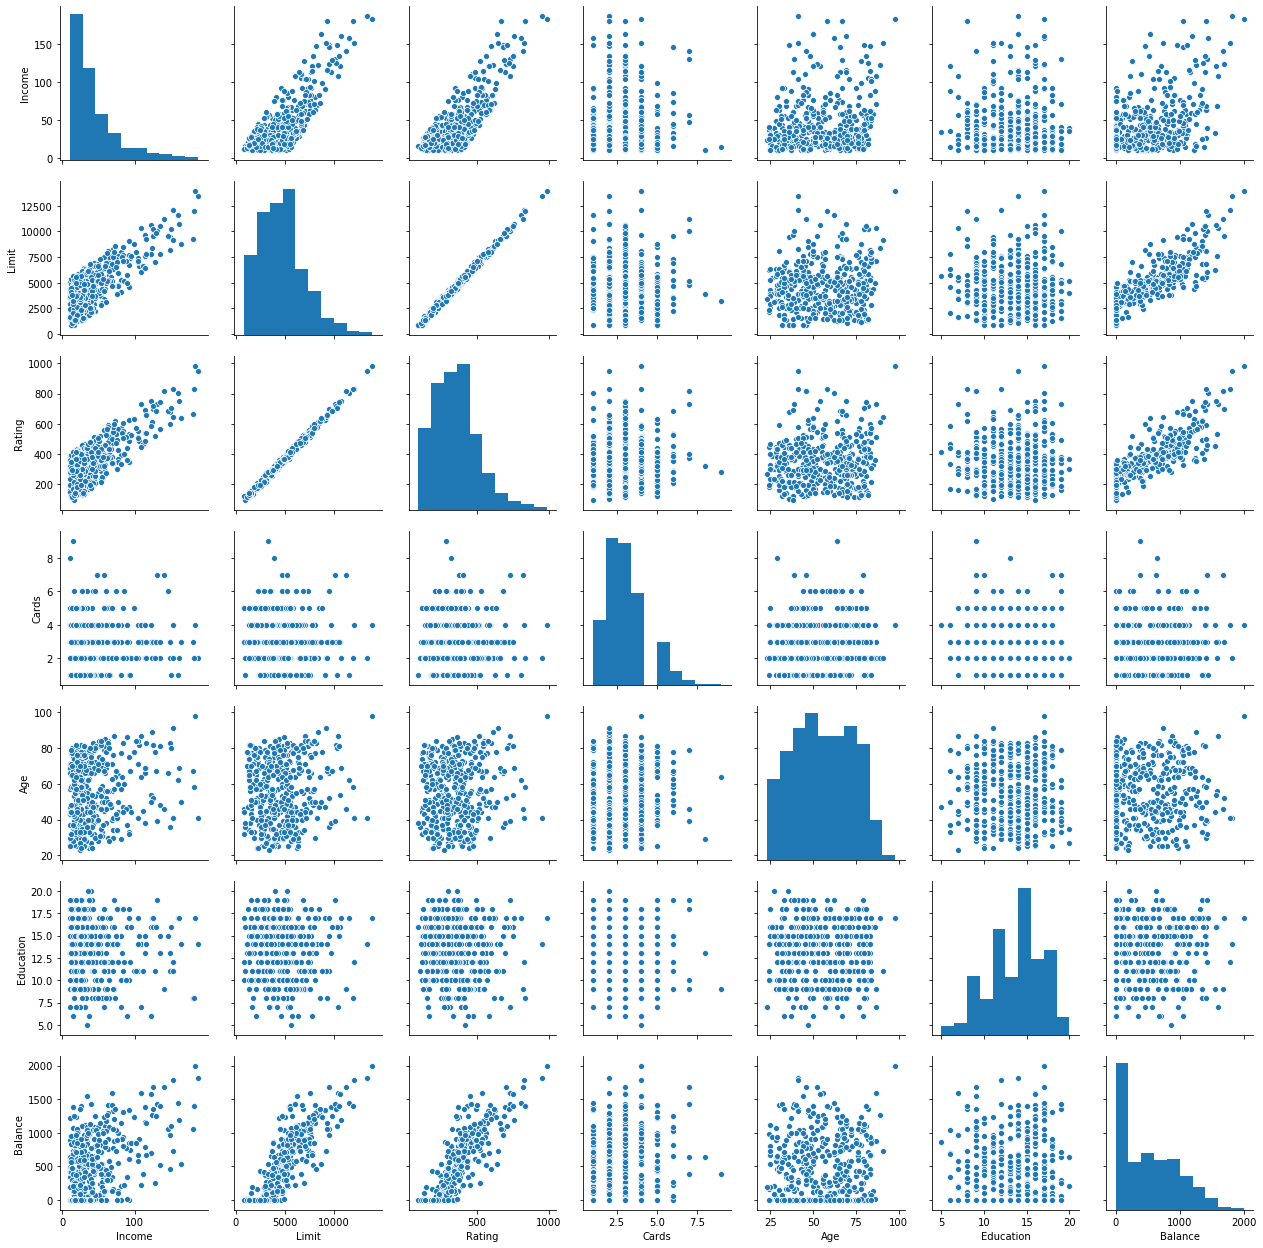

In [14]:
import seaborn as sns
sns.pairplot(credit)

In [27]:
results = smf.ols('Balance ~ Gender', data=credit).fit()


In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Wed, 19 Feb 2020   Prob (F-statistic):              0.669
Time:                        16:45:35   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          509.8031     33.128     15.389      0.000     444.675     574.931
Gender[T.Female]    19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

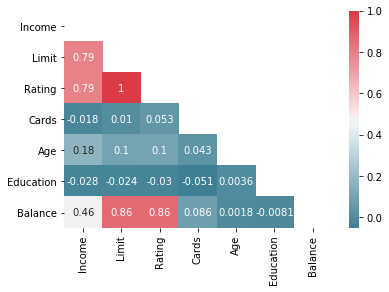

In [29]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = credit.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,mask = mask, cmap=cmap,annot=True)

In [31]:
results = smf.ols('Balance ~ Ethnicity', data=credit).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Wed, 19 Feb 2020   Prob (F-statistic):              0.957
Time:                        17:04:14   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
results = smf.ols('Sales~TV+Radio+TV*Radio', data=adv).fit()
results.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [70]:
auto = pd.read_csv(r'Data/Auto.csv',na_values = '?')
auto.dropna(inplace=True)
auto.head()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [71]:
results = smf.ols('mpg~horsepower+np.power(horsepower,2)', data=auto).fit()
results.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
"np.power(horsepower, 2)",0.0012,0.000,10.080,0.000,0.001,0.001


(392, 3)


(392,)

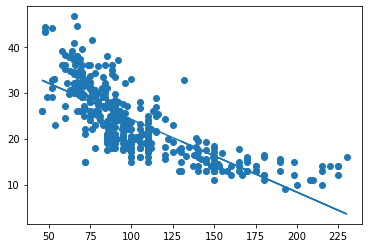

In [79]:
plt.scatter('horsepower', 'mpg',data = auto)
est = LinearRegression()
X = auto['horsepower'].values.reshape(-1,1)
y = auto['mpg']

est.fit(X,y)
plt.plot(X,est.predict(X))

from sklearn.preprocessing import PolynomialFeatures
X2 = PolynomialFeatures(2).fit_transform(X)
print(X2.shape)
est.fit(X2,y)
est.predict(X2).shape